# Лабораторная работа №4 "Интерполяция, экстраполяция, аппроксимация функций"
### Выполнил студент 430 группы Бахтин Владимир
### Вариант 25

Интерполяционные формулы Ньютона — формулы вычислительной математики, применяющиеся
для полиномиального интерполирования.
Если узлы интерполяции равноотстоящие и упорядочены по величине, то интерполяционный многочлен можно записать в форме Ньютона.
Интерполяционные полиномы в форме Ньютона удобно использовать, если точка интерполирования
находится вблизи начала (прямая формула Ньютона) или конца таблицы (обратная формула Ньютона).
В работе необходимо работать с интеполяционными формулами Ньютона до 3 степени включительно.
Первая интерполяционная формула Ньютона, применяется для интерполирования вперёд:
    $$P_n(x)=y_0+q \delta y_0+\frac{q(q-1)}{2}\delta^2y_0+\frac{q(q-1)(q-2)}{6}\delta^3y_0)+O(\delta^4y_0)$$

Вторая интерполяционная формула Ньютона, применяется для интерполирования назад:
    $$P_n(x)=y_n+q\delta y_{n-1}+\frac{q(q-1)}{2}\delta^2y_{n-2}+\frac{q(q-1)(q-2)}{6}\delta^3y_{n-3}+O(\delta^4y_{n-4})$$
где $q=\frac{x-x_0}{h}$, h - шаг интерполяции,
а выражения вида $\delta^ny_0$ — конечные разности.

Интерполяцио́нный многочле́н Лагра́нжа — многочлен минимальной степени, принимающий данные значения в данном наборе точек. Для n+1 пар чисел $(x_0, y_0), (x_1, y_1),…, (x_n, y_n)$, где все $x_j$
различны, существует единственный многочлен L(x) степени не более n, для которого $L(x_j) = y_j$.
В простейшем случае (n=1) — это линейный многочлен, график которого — прямая, проходящая через две заданные точки/
Лагранж предложил способ вычисления таких многочленов:
$$L(x)=\sum_{i=0}^{n} y_il_i(x)$$
где базисные полиномы определяются по формуле:
$$l_i(x)=\prod_{j=0,j\ne i}^{n} \frac{x-x_j}{x_i-x_j}  $$

Численное дифференцирование — совокупность методов вычисления значения производной
дискретно заданной функции.
В основе численного дифференцирования лежит аппроксимация функции, от которой берется
производная, интерполяционным многочленом. Все основные формулы численного дифференцирования
могут быть получены при помощи первого интерполяционного многочлена Ньютона (формулы Ньютона
для начала таблицы).
Один из универсальных способов построения формул численного дифференцирования состоит в том,
что по значениям функции в некоторых узлах строят интерполяционный полином
(в форме Лагранжа или в форме Ньютона) и приближенно полагают:
$$f^{(r)} \approx P_N^{(r)}, 0\le r\le n  $$

Eсли функция f (x) задана на отрезке $[0, 2p]$ в $(2N+1)$ дискретных точках, т.е. с шагом $\frac{2p}{2N+1}$, то она может быть представлена как:
$$f(x)=\frac{A_0}{2}+\sum_{k=1}^{M} (A_kcoskx+B_ksinkx)$$
причем 0 $\le$ M $\le$ N и 0 $\le$ x $\le$ 2 p. 

Поскольку система функций, участвующих в разложении, ортогональна на заданном дискретном множестве точек, коэффициенты разложения представляются формулами:
$$A_k=\frac{2}{2N+1}\sum_{l=0}^{2N} f(\frac{2\pi l}{2N+1})cos\frac{2\pi k}{2N+1}l, k=0,1,...,N.$$
$$B_k=\frac{2}{2N+1}\sum_{l=0}^{2N} f(\frac{2\pi l}{2N+1})sin\frac{2\pi k}{2N+1}l, k=0,1,...,N.$$

Метод наименьших квадратов (МНК, англ. Ordinary Least Squares, OLS) — математический метод, применяемый для решения
различных задач,основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. Он может
использоваться для «решения» переопределенных систем уравнений (когда количество уравнений превышает количество
неизвестных), для поиска решения в случае обычных (не переопределенных) нелинейных систем уравнений, для аппроксимации
точечных значений некоторой функции. МНК является одним из базовых методов регрессионного анализа для оценки неизвестных
параметров регрессионных моделей по выборочным данным.
Задача заключается в подборе таких значений x, чтобы значения этих функций были максимально
близки к некоторым значениям $y_i$.
Таким образом, сущность МНК может быть выражена следующим образом:
$$\sum_i (y_i-f_i(x))^2 \to min$$

In [1]:
import math 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [3]:
def J(x):
    return 25+(x*0.1)

In [4]:
f = [-0.00055, 0.328549, 0.627288, 0.866148, 1.021332, 1.077122, 1.027476, 0.876673, 0.638952, 0.337172, -0.00055]
print('x','    f(x)')
for i in range (0,11):
    J(i)
    print(J(i), f[i])
print('')
n = 10
m = 10
Q = [[0] * m for i in range(n)]
k=10
for i in range (0,10):
    for j in range (0,k):
        if i==0:
            Q[j][i]=f[j+1]-f[j]
        if i!=0:
            Q[j][i]=Q[j+1][i-1]-Q[j][i-1]
    k=k-1
    ##print(k)
for i in range (0,10):
    print('Конечные разности {0}-го рода'.format(i+1))
    print('{0}  {1}  {2}  {3}  {4}  {5}  {6}  {7}  {8}  {9}'.format(Q[0][i], Q[1][i], Q[2][i], Q[3][i], Q[4][i], Q[5][i], Q[6][i],Q[7][i],Q[8][i],Q[9][i]))
    print('')

x     f(x)
25.0 -0.00055
25.1 0.328549
25.2 0.627288
25.3 0.866148
25.4 1.021332
25.5 1.077122
25.6 1.027476
25.7 0.876673
25.8 0.638952
25.9 0.337172
26.0 -0.00055

Конечные разности 1-го рода
0.329099  0.298739  0.23886000000000007  0.15518399999999988  0.055790000000000006  -0.04964599999999986  -0.15080300000000002  -0.23772100000000007  -0.30177999999999994  -0.337722

Конечные разности 2-го рода
-0.030359999999999998  -0.059878999999999905  -0.0836760000000002  -0.09939399999999987  -0.10543599999999986  -0.10115700000000016  -0.08691800000000005  -0.06405899999999987  -0.035942000000000085  0

Конечные разности 3-го рода
-0.029518999999999906  -0.02379700000000029  -0.015717999999999677  -0.006041999999999992  0.0042789999999997  0.014239000000000113  0.022859000000000185  0.02811699999999978  0  0

Конечные разности 4-го рода
0.005721999999999616  0.008079000000000613  0.009675999999999685  0.010320999999999692  0.009960000000000413  0.008620000000000072  0.005257999999999596  

In [5]:
def q(i,j):
    return (i-J(j))/0.1

Интерполяция многочленом Ньютона

линейная интерполяция

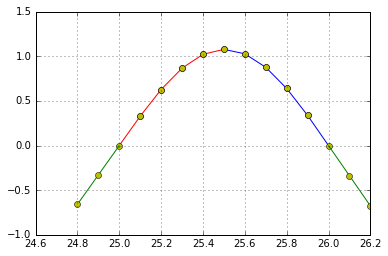

In [6]:
for j in range (0,11):
    if j<5:
        x = np.arange(J(j), J(j+1)+0.0000001, 0.001)
        X = np.arange(J(j), J(j+1)+0.0000001, 0.1)
        ##u[j]=(f[j+1]-f[j])
        ##y =[f[j]+(((i-J(j-2))/0.1)*u[j]) for i in x]
        y =[f[j]+(q(i,j)*Q[j][0]) for i in x]
        Y =[f[j]+(q(i,j)*Q[j][0]) for i in X]
        plt.plot(x,y,'r-')
        plt.plot(X,Y,'yo')
        if j==0:
            u = np.arange(24.8, 25, 0.001)
            u1 = np.arange(24.8, 25, 0.1)
            U = [f[j]+(q(i,j)*Q[j][0]) for i in u]
            U1 = [f[j]+(q(i,j)*Q[j][0]) for i in u1]
            plt.plot(u,U,'g-')
            plt.plot(u1,U1,'yo')
    if j>5:
        n=15-j
        x = np.arange(J(n+1), J(n)-0.0000001, -0.001)
        X = np.arange(J(n+1), J(n)-0.0000001, -0.1)
        ##u[n]=(f[n+1]-f[n])
        ##y =[f[n]+(((i-J(n-2))/0.1)*u[n]) for i in x]
        y =[f[n+1]+(q(i,n+1)*Q[n][0]) for i in x]
        Y =[f[n+1]+(q(i,n+1)*Q[n][0]) for i in X]
        plt.plot(x,y,'b-')
        plt.plot(X,Y,'yo')
        if j==6:
            u = np.arange(26.2, 26, -0.001)
            u1 = np.arange(26.2, 26, -0.1)
            U = [f[n+1]+(q(i,n+1)*Q[n][0]) for i in u]
            U1 = [f[n+1]+(q(i,n+1)*Q[n][0]) for i in u1]
            plt.plot(u,U,'g-')
            plt.plot(u1,U1,'yo')
plt.grid() 
plt.show()

квадратичная интерполяция

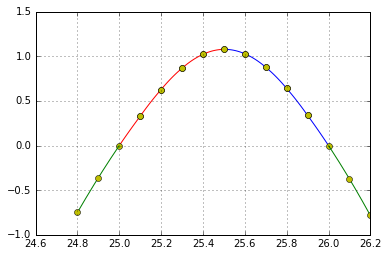

In [7]:
for j in range (0,11):
    if j<5:
        x = np.arange(J(j)-0.0000001, J(j+1), 0.001)
        X = np.arange(J(j)-0.0000001, J(j+1), 0.1)
        y =[f[j]+(q(i,j)*Q[j][0])+(q(i,j)*(q(i,j)-1)*0.5*Q[j][1]) for i in x]
        Y =[f[j]+(q(i,j)*Q[j][0])+(q(i,j)*(q(i,j)-1)*0.5*Q[j][1]) for i in X]
        plt.plot(x,y,'r-')
        plt.plot(X,Y,'yo')
        if j==0:
            u = np.arange(24.8, 25, 0.001)
            u1 = np.arange(24.8, 25, 0.1)
            U = [f[j]+(q(i,j)*Q[j][0])+(q(i,j)*(q(i,j)-1)*0.5*Q[j][1]) for i in u]
            U1 = [f[j]+(q(i,j)*Q[j][0])+(q(i,j)*(q(i,j)-1)*0.5*Q[j][1]) for i in u1]
            plt.plot(u,U,'g-')
            plt.plot(u1,U1,'yo')
    if j>5:
        n=15-j
        x = np.arange(J(n+1), J(n)-0.000000000001, -0.001)
        X = np.arange(J(n+1), J(n)-0.000000000001, -0.1)
        ##y =[f[n]+(((i-J(n-2))/0.1)*u[n]) for i in x]
        y =[f[n+1]+(q(i,n+1)*Q[n][0])+(q(i,n+1)*(q(i,n+1)+1)*0.5*Q[n-1][1]) for i in x]
        Y =[f[n+1]+(q(i,n+1)*Q[n][0])+(q(i,n+1)*(q(i,n+1)+1)*0.5*Q[n-1][1]) for i in X]
        plt.plot(x,y,'b-')
        plt.plot(X,Y,'yo')
        if j==6:
            u = np.arange(26.2, 26, -0.001)
            u1 = np.arange(26.2, 26, -0.1)
            U = [f[n+1]+(q(i,n+1)*Q[n][0])+(q(i,n+1)*(q(i,n+1)+1)*0.5*Q[n-1][1]) for i in u]
            U1 = [f[n+1]+(q(i,n+1)*Q[n][0])+(q(i,n+1)*(q(i,n+1)+1)*0.5*Q[n-1][1]) for i in u1]
            plt.plot(u,U,'g-')
            plt.plot(u1,U1,'yo')
plt.grid() 
plt.show()

кубическая интерполяция

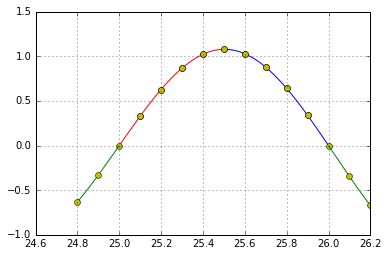

In [8]:
for j in range (0,11):
    if j<5:
        x = np.arange(J(j)-0.0000001, J(j+1), 0.001)
        X = np.arange(J(j)-0.0000001, J(j+1), 0.1)
        y =[f[j]+(q(i,j)*Q[j][0])+(q(i,j)*(q(i,j)-1)*0.5*Q[j][1])+(q(i,j)*(q(i,j)-1)*(q(i,j)-2)*0.16666667*Q[j][2]) for i in x]
        Y =[f[j]+(q(i,j)*Q[j][0])+(q(i,j)*(q(i,j)-1)*0.5*Q[j][1])+(q(i,j)*(q(i,j)-1)*(q(i,j)-2)*0.16666667*Q[j][2]) for i in X]
        plt.plot(x,y,'r-')
        plt.plot(X,Y,'yo')
        if j==0:
            u = np.arange(24.8, 25, 0.001)
            u1 = np.arange(24.8, 25, 0.1)
            U = [f[j]+(q(i,j)*Q[j][0])+(q(i,j)*(q(i,j)-1)*0.5*Q[j][1])+(q(i,j)*(q(i,j)-1)*(q(i,j)-2)*0.16666667*Q[j][2]) for i in u]
            U1 = [f[j]+(q(i,j)*Q[j][0])+(q(i,j)*(q(i,j)-1)*0.5*Q[j][1])+(q(i,j)*(q(i,j)-1)*(q(i,j)-2)*0.16666667*Q[j][2]) for i in u1]
            plt.plot(u,U,'g-')
            plt.plot(u1,U1,'yo')
    if j>5:
        n=15-j
        x = np.arange(J(n+1), J(n)-0.000000000001, -0.001)
        X = np.arange(J(n+1), J(n)-0.000000000001, -0.1)
        ##y =[f[n]+(((i-J(n-2))/0.1)*u[n]) for i in x]
        y =[f[n+1]+(q(i,n+1)*Q[n][0])+(q(i,n+1)*(q(i,n+1)+1)*0.5*Q[n-1][1])+(q(i,n+1)*(q(i,n+1)+1)*(q(i,n+1)+2)*0.16666667*Q[n-2][2]) for i in x]
        Y =[f[n+1]+(q(i,n+1)*Q[n][0])+(q(i,n+1)*(q(i,n+1)+1)*0.5*Q[n-1][1])+(q(i,n+1)*(q(i,n+1)+1)*(q(i,n+1)+2)*0.16666667*Q[n-2][2]) for i in X]
        plt.plot(x,y,'b-')
        plt.plot(X,Y,'yo')
        if j==6:
            u = np.arange(26.2, 26, -0.001)
            u1 = np.arange(26.2, 26, -0.1)
            U = [f[n+1]+(q(i,n+1)*Q[n][0])+(q(i,n+1)*(q(i,n+1)+1)*0.5*Q[n-1][1])+(q(i,n+1)*(q(i,n+1)+1)*(q(i,n+1)+2)*0.16666667*Q[n-2][2]) for i in u]
            U1 = [f[n+1]+(q(i,n+1)*Q[n][0])+(q(i,n+1)*(q(i,n+1)+1)*0.5*Q[n-1][1])+(q(i,n+1)*(q(i,n+1)+1)*(q(i,n+1)+2)*0.16666667*Q[n-2][2]) for i in u1]
            plt.plot(u,U,'g-')
            plt.plot(u1,U1,'yo')
plt.grid() 
plt.show()

Интерполяция многочленом Лагранжа

In [9]:
def w(i,j):
    return i-J(j)
def T(i,j):
    if j == 0: 
        return w(i,0)
    else:
        return T(i,j-1)*w(i,j)
def r(k):
    R=1.0
    for a in range (0,11):
        if a!=k:
            R=R*w(J(k),a)
    return R 
def l(i,k):
    if i!=J(k):
        return T(i,10)/((i-J(k))*r(k))
    else:
        return 1.0
def s(i,k):
    return f[k]*l(i,k)
def S(i,k):
    if k == 0: 
        return s(i,0)
    else:
        return S(i,k-1)+s(i,k)

In [10]:
print('x','    f(x)')
for j in range (0,21):
    i=0.5*j
    print(J(i),'',S(J(i),10))

x     f(x)
25.0  -0.00055
25.05  0.16581070494839278
25.1  0.328549
25.15  0.48365932518768445
25.2  0.627288
25.25  0.7558555195846535
25.3  0.866148
25.35  0.9553939775924714
25.4  1.021332
25.45  1.0622683749923707
25.5  1.077122
25.55  1.065453311393738
25.6  1.027476
25.65  0.9640521696090728
25.7  0.876673
25.75  0.7674266469039899
25.8  0.638952
25.85  0.4943699581222556
25.9  0.337172
25.95  0.17102796068569673
26.0  -0.00055


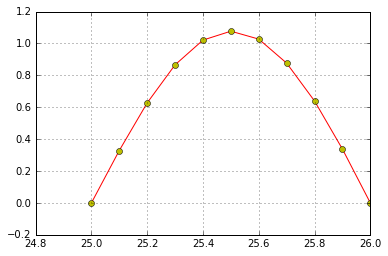

In [11]:
##for i in range (25,26):
##    if i!=J(k):
##        print (S(i,10))
x = np.arange(25.0-0.00000001, 26.0, 0.1)
y = [S(i,10) for i in x]
plt.plot(x,y,'-r')
plt.plot(x,y,'yo') 
plt.grid() 
plt.show()

Численное дифференцирование

In [12]:
def f1(i):
    return (S(i+0.1,10)-S(i,10))/h
def f2(i):
    return (S(i+0.1,10)-2*S(i,10)+S(i-0.1,10))/(h**2)

1-ая производная

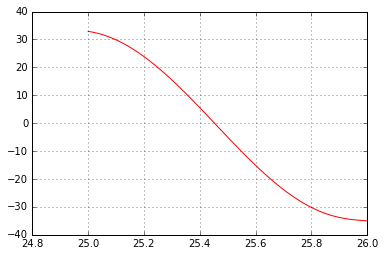

32.909900145
32.7488898614
32.5558012378
32.3306836757
32.0736482773
31.7848623285
31.4645444528
31.112960373
30.7304192195
30.3172703255
29.8739004583


In [13]:
h=0.01
x = np.arange(25.0-0.00000001, 26.0, 0.01) 
y = [f1(i) for i in x]
plt.plot(x,y,'r-')
plt.grid() 
plt.show()
for i in range (0,11):
    print (y[i])

2-ая производная

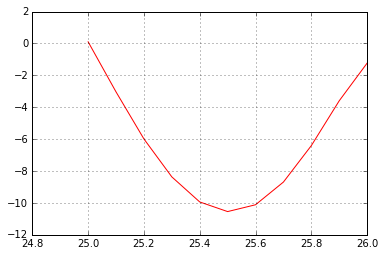

0.105700301747
-3.03599968663
-5.98789972882
-8.3675997991
-9.93939988926
-10.543599991
-10.115700094
-8.69180018871
-6.40590026352
-3.59420028432
-1.23090014641


In [14]:
h=0.1
x = np.arange(25.0-0.00000001, 26.0, 0.1) 
y = [f2(i) for i in x]
plt.plot(x,y,'r-')
plt.grid() 
plt.show()
for i in range (0,11):
    print (y[i])

Тригонометрическая аппроксимация

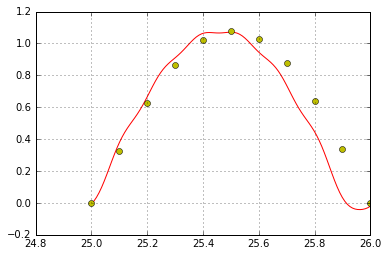

25.0 -0.00670723543063612
25.1 0.01170409340191772
25.2 0.03525829534915767
25.3 0.06408271943451319
25.4 0.09788779489810832
25.5 0.13594796018738275
25.6 0.17714908215061678
25.7 0.2200968030686414
25.8 0.2632706824432995
25.9 0.30520173579164583
26.0 0.3446471482927076


In [15]:
def A(k,l):
    if l == 0: 
        return f[0]*(2/11)
    else:
        return A(k,l-1)+((2/11)*(f[l]*math.cos((2*math.pi*l*k)/11)))
def B(k,l):
    if l == 0: 
        return f[0]*(2/11)
    else:
        return B(k,l-1)+((2/11)*(f[l]*math.sin((2*math.pi*l*k)/11)))
def Tr(i,k,l):
    if k == 1: 
        return ((A(1,l)*math.cos(i))+(B(1,l)*math.sin(i)))+(A(0,l)/2)
    else:
        return Tr(i,k-1,l)+((A(k,l)*math.cos(k*i))+(B(k,l)*math.sin(k*i)))
x = np.arange(0, 2*math.pi, (2*math.pi)/110) 
y = [Tr(i,7,10) for i in x]
##xx = np.arange(25, 26, 0.1)
plt.plot((x/(109*(2*math.pi)/110))+25,y,'r-')
for u in range (0,11):
    U=f[u]
    X = np.arange((2*u*math.pi)/11, ((2*(u+1.0)*math.pi)/11)-0.0000000001, (2*math.pi)/11)
    Y = [U for i in X] 
    plt.plot((X/(10*(2*math.pi)/11))+25,Y,'oy')
#plt.plot(np.linspace(25.0,26.0,11),f,'yo')
plt.grid() 
plt.show()
for i in range (0,11):
    p=i*(2*math.pi)/11
    print((p/(10*(2*math.pi)/11))+25,y[i])

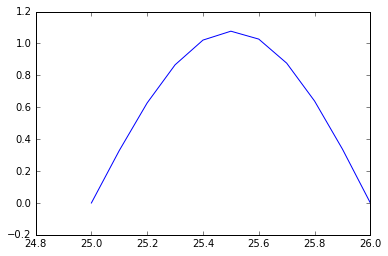

In [16]:
plt.plot(np.linspace(25.0,26.0,11),f)

Аппроксимация методом наименьших квадратов

In [17]:
import numpy
def F(z,h,e,d,c,b,a,o):
    return (h*(z**6))+(e*(z**5))+(d*(z**4))+(c*(z**3))+(b*(z**2))+(a*z)+o
n=12
I=0
Q1 = [ 0.0 for i in range (n)]
for i in range (0,12):
    for j in range (0,11):
        I=J(j)**(i+1)
        Q1[i]=Q1[i]+I
print(Q1)
print('')
n=7
U=0
Q2 = [ 0.0 for i in range (n)]
for i in range (0,7):
    for j in range (0,11):
        U=((J(j))**i)*(f[j])
        Q2[i]=Q2[i]+U
print(Q2)

[280.5, 7153.85, 182479.275, 4655367.5333, 118784850.12075001, 3031340489.153405, 77370408870.37267, 1975065377750.9985, 50425982377755.55, 1287637007076340.5, 3.288505660278482e+16, 8.399813781038473e+17]

[6.799612000000001, 173.39977380000002, 4422.25116368, 112789.522664814, 2876898.7552333036, 73385600.49003522, 1872093636.9350789]


[[  8.39981378e+17   3.28850566e+16   1.28763701e+15   5.04259824e+13
    1.97506538e+12   7.73704089e+10   3.03134049e+09]
 [  3.28850566e+16   1.28763701e+15   5.04259824e+13   1.97506538e+12
    7.73704089e+10   3.03134049e+09   1.18784850e+08]
 [  1.28763701e+15   5.04259824e+13   1.97506538e+12   7.73704089e+10
    3.03134049e+09   1.18784850e+08   4.65536753e+06]
 [  5.04259824e+13   1.97506538e+12   7.73704089e+10   3.03134049e+09
    1.18784850e+08   4.65536753e+06   1.82479275e+05]
 [  1.97506538e+12   7.73704089e+10   3.03134049e+09   1.18784850e+08
    4.65536753e+06   1.82479275e+05   7.15385000e+03]
 [  7.73704089e+10   3.03134049e+09   1.18784850e+08   4.65536753e+06
    1.82479275e+05   7.15385000e+03   2.80500000e+02]
 [  3.03134049e+09   1.18784850e+08   4.65536753e+06   1.82479275e+05
    7.15385000e+03   2.80500000e+02   1.10000000e+01]]
[  1.87209364e+09   7.33856005e+07   2.87689876e+06   1.12789523e+05
   4.42225116e+03   1.73399774e+02   6.79961200e+00]
[array([ 

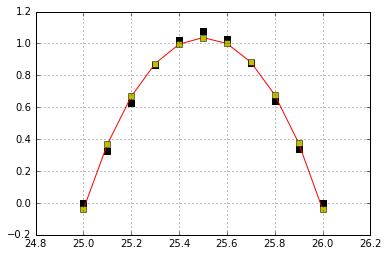

In [18]:
##n=6
M2 = numpy.array([[Q1[11],Q1[10],Q1[9],Q1[8],Q1[7],Q1[6],Q1[5]],[Q1[10],Q1[9],Q1[8],Q1[7],Q1[6],Q1[5],Q1[4]],[Q1[9],Q1[8],Q1[7],Q1[6],Q1[5],Q1[4],Q1[3]],[Q1[8],Q1[7],Q1[6],Q1[5],Q1[4],Q1[3],Q1[2]],[Q1[7],Q1[6],Q1[5],Q1[4],Q1[3],Q1[2],Q1[1]],[Q1[6],Q1[5],Q1[4],Q1[3],Q1[2],Q1[1],Q1[0]],[Q1[5],Q1[4],Q1[3],Q1[2],Q1[1],Q1[0],11]]) # Матрица (левая часть системы)
v2 = numpy.array([Q2[6],Q2[5],Q2[4],Q2[3],Q2[2],Q2[1],Q2[0]]) # Вектор (правая часть системы)
print(M2)
print(v2)
numpy.linalg.solve(M2, v2)
M=[numpy.linalg.solve(M2, v2)]
print(M)
print('')
for c in range (0,7):
    print (M[0][c])
x = np.arange(25.0, 26.0+0.00000000001, 0.1)
y = [((-0.0010417881628)*(z**6))+((0.0665579248179)*(z**5))+((0.0333261267063)*(z**4))+((-90.7822505601)*(z**3))+((2382.1166401)*(z**2))+((-19921.0090715)*z)+(19020.0118484) for z in x]
for u in range (0,11):
    U=f[u]
    X = np.arange(25+(0.1*u),25+(0.1*(u+0.000001)),0.00000001)
    Y = [U for i in X] 
    plt.plot(X,Y,'ks')
plt.plot(x,y,'-r')
plt.plot(x,y,'ys') 
plt.grid() 
plt.show()

[[  1.28763701e+15   5.04259824e+13   1.97506538e+12   7.73704089e+10
    3.03134049e+09   1.18784850e+08]
 [  5.04259824e+13   1.97506538e+12   7.73704089e+10   3.03134049e+09
    1.18784850e+08   4.65536753e+06]
 [  1.97506538e+12   7.73704089e+10   3.03134049e+09   1.18784850e+08
    4.65536753e+06   1.82479275e+05]
 [  7.73704089e+10   3.03134049e+09   1.18784850e+08   4.65536753e+06
    1.82479275e+05   7.15385000e+03]
 [  3.03134049e+09   1.18784850e+08   4.65536753e+06   1.82479275e+05
    7.15385000e+03   2.80500000e+02]
 [  1.18784850e+08   4.65536753e+06   1.82479275e+05   7.15385000e+03
    2.80500000e+02   1.10000000e+01]]
[  7.33856005e+07   2.87689876e+06   1.12789523e+05   4.42225116e+03
   1.73399774e+02   6.79961200e+00]

0.0236789826403
0.807128805126
-236.408793251
11004.6948998
-203658.517273
1360891.25849


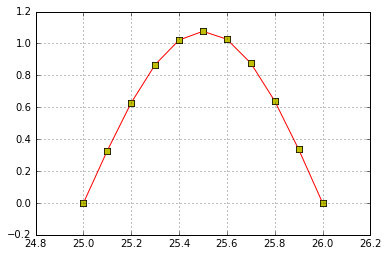

In [19]:
##n=5
M2 = numpy.array([[Q1[9],Q1[8],Q1[7],Q1[6],Q1[5],Q1[4]],[Q1[8],Q1[7],Q1[6],Q1[5],Q1[4],Q1[3]],[Q1[7],Q1[6],Q1[5],Q1[4],Q1[3],Q1[2]],[Q1[6],Q1[5],Q1[4],Q1[3],Q1[2],Q1[1]],[Q1[5],Q1[4],Q1[3],Q1[2],Q1[1],Q1[0]],[Q1[4],Q1[3],Q1[2],Q1[1],Q1[0],11]]) # Матрица (левая часть системы)
v2 = numpy.array([Q2[5],Q2[4],Q2[3],Q2[2],Q2[1],Q2[0]]) # Вектор (правая часть системы)
print(M2)
print(v2)
numpy.linalg.solve(M2, v2)
M=[numpy.linalg.solve(M2, v2)]
print('')
for c in range (0,6):
    print (M[0][c])
x = np.arange(25.0, 26.0+0.0000000001, 0.1)
y = [((0.0236789826403)*(z**5))+((0.807128805126)*(z**4))+((-236.408793251)*(z**3))+((11004.6948998)*(z**2))+((-203658.517273)*z)+(1360891.25849) for z in x]
for u in range (0,11):
    U=f[u]
    X = np.arange(25+(0.1*u),25+(0.1*(u+0.000001)),0.00000001)
    Y = [U for i in X] 
    plt.plot(X,Y,'ks')
plt.plot(x,y,'-r')
plt.plot(x,y,'ys')
plt.grid() 
plt.show()

[[  1.97506538e+12   7.73704089e+10   3.03134049e+09   1.18784850e+08
    4.65536753e+06]
 [  7.73704089e+10   3.03134049e+09   1.18784850e+08   4.65536753e+06
    1.82479275e+05]
 [  3.03134049e+09   1.18784850e+08   4.65536753e+06   1.82479275e+05
    7.15385000e+03]
 [  1.18784850e+08   4.65536753e+06   1.82479275e+05   7.15385000e+03
    2.80500000e+02]
 [  4.65536753e+06   1.82479275e+05   7.15385000e+03   2.80500000e+02
    1.10000000e+01]]
[  2.87689876e+06   1.12789523e+05   4.42225116e+03   1.73399774e+02
   6.79961200e+00]

0.670038423935
-68.461395534
2618.66710782
-44441.5589479
282347.553899


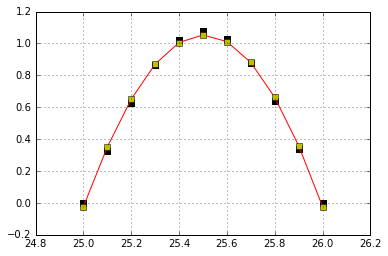

In [20]:
##n=4
M2 = numpy.array([[Q1[7],Q1[6],Q1[5],Q1[4],Q1[3]],[Q1[6],Q1[5],Q1[4],Q1[3],Q1[2]],[Q1[5],Q1[4],Q1[3],Q1[2],Q1[1]],[Q1[4],Q1[3],Q1[2],Q1[1],Q1[0]],[Q1[3],Q1[2],Q1[1],Q1[0],11]]) # Матрица (левая часть системы)
v2 = numpy.array([Q2[4],Q2[3],Q2[2],Q2[1],Q2[0]]) # Вектор (правая часть системы)
print(M2)
print(v2)
numpy.linalg.solve(M2, v2)
M=[numpy.linalg.solve(M2, v2)]
print('')
for c in range (0,5):
    print (M[0][c])
x = np.arange(25.0, 26.0+0.00000001, 0.1)
y = [((0.670038423935)*(z**4))+((-68.461395534)*(z**3))+((2618.66710782)*(z**2))+((-44441.5589479)*z)+(282347.553899) for z in x]
for u in range (0,11):
    U=f[u]
    X = np.arange(25+(0.1*u),25+(0.1*(u+0.000001)),0.00000001)
    Y = [U for i in X] 
    plt.plot(X,Y,'ks')
plt.plot(x,y,'-r')
plt.plot(x,y,'ys') 
plt.grid() 
plt.show()

[[  3.03134049e+09   1.18784850e+08   4.65536753e+06   1.82479275e+05]
 [  1.18784850e+08   4.65536753e+06   1.82479275e+05   7.15385000e+03]
 [  4.65536753e+06   1.82479275e+05   7.15385000e+03   2.80500000e+02]
 [  1.82479275e+05   7.15385000e+03   2.80500000e+02   1.10000000e+01]]
[  1.12789523e+05   4.42225116e+03   1.73399774e+02   6.79961200e+00]

-0.123628558153
5.15037812606
-21.4700798191
-750.565990433


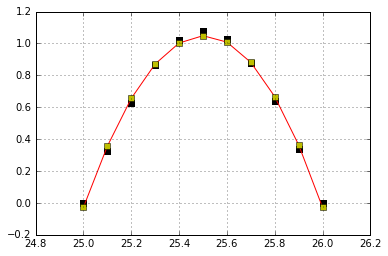

In [21]:
##n=3
M2 = numpy.array([[Q1[5],Q1[4],Q1[3],Q1[2]],[Q1[4],Q1[3],Q1[2],Q1[1]],[Q1[3],Q1[2],Q1[1],Q1[0]],[Q1[2],Q1[1],Q1[0],11]]) # Матрица (левая часть системы)
v2 = numpy.array([Q2[3],Q2[2],Q2[1],Q2[0]]) # Вектор (правая часть системы)
print(M2)
print(v2)
numpy.linalg.solve(M2, v2)
M=[numpy.linalg.solve(M2, v2)]
print('')
for c in range (0,4):
    print (M[0][c])
x = np.arange(25.0, 26.0+0.00000001, 0.1)
y = [((-0.123628558153)*(z**3))+((5.15037812606)*(z**2))+((-21.4700798191)*z)+(-750.565990433) for z in x]
for u in range (0,11):
    U=f[u]
    X = np.arange(25+(0.1*u),25+(0.1*(u+0.000001)),0.00000001)
    Y = [U for i in X] 
    plt.plot(X,Y,'ks')
plt.plot(x,y,'-r')
plt.plot(x,y,'ys') 
plt.grid() 
plt.show()

[[  4.65536753e+06   1.82479275e+05   7.15385000e+03]
 [  1.82479275e+05   7.15385000e+03   2.80500000e+02]
 [  7.15385000e+03   2.80500000e+02   1.10000000e+01]]
[ 4422.25116368   173.3997738      6.799612  ]

-4.3072063855
219.676314569
-2799.93620216


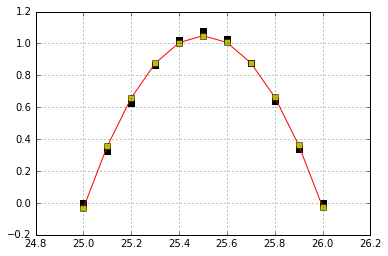

In [22]:
##n=2
M2 = numpy.array([[Q1[3],Q1[2],Q1[1]],[Q1[2],Q1[1],Q1[0]],[Q1[1],Q1[0],11]]) # Матрица (левая часть системы)
v2 = numpy.array([Q2[2],Q2[1],Q2[0]]) # Вектор (правая часть системы)
print(M2)
print(v2)
numpy.linalg.solve(M2, v2)
M=[numpy.linalg.solve(M2, v2)]
print('')
for c in range (0,3):
    print (M[0][c])
x = np.arange(25.0, 26.0+0.00000001, 0.1)
y = [(((-4.3072063855)*(i**2))+((219.676314569)*i)-(2799.93620216)) for i in x]
for u in range (0,11):
    U=f[u]
    X = np.arange(25+(0.1*u),25+(0.1*(u+0.000001)),0.00000001)
    Y = [U for i in X] 
    plt.plot(X,Y,'ks')
plt.plot(x,y,'-r')
plt.plot(x,y,'ys') 
plt.grid() 
plt.show()

[[ 7153.85   280.5 ]
 [  280.5     11.  ]]
[ 173.3997738    6.799612 ]

0.0087889090909
0.394029363637


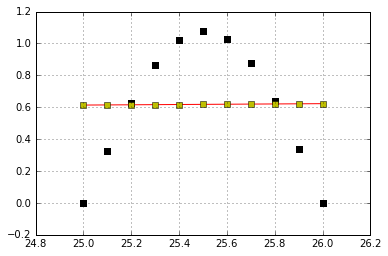

In [23]:
##n=1
M2 = numpy.array([[Q1[1],Q1[0]],[Q1[0],11]]) # Матрица (левая часть системы)
v2 = numpy.array([Q2[1],Q2[0]]) # Вектор (правая часть системы)
print(M2)
print(v2)
numpy.linalg.solve(M2, v2)
M=[numpy.linalg.solve(M2, v2)]
print('')
for c in range (0,2):
    print (M[0][c])
x = np.arange(25.0, 26.0+0.00000001, 0.1)
y = [(((0.0087889090909)*i)+(0.394029363637)) for i in x]
for u in range (0,11):
    U=f[u]
    X = np.arange(25+(0.1*u),25+(0.1*(u+0.000001)),0.00000001)
    Y = [U for i in X] 
    plt.plot(X,Y,'ks')
plt.plot(x,y,'-r')
plt.plot(x,y,'ys') 
plt.grid() 
plt.show()